# Comparing MC and LHS methods for sampling from a uniform distribution

In [1]:
import numpy as np
import lhsmdu
import matplotlib.pyplot as plt

In [2]:
def simpleaxis(axes, every=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

### Params

In [3]:
seed = 1
np.random.seed(seed)
lhsmdu.setRandomSeed(seed)

numDimensions = 2
numSamples = 100
numIterations = 100

### Theoretical values

In [4]:
theoretical_mean = 0.5
theoretical_std = np.sqrt(1./12)
theoretical_skew = 0.

## Emperical mean ($\mu$) and standard deviation ($\sigma$) estimates

In [5]:
mc_Mean, lhs_Mean = [], []
mc_Std, lhs_Std = [], []

for iterate in range(numIterations):
    a = np.random.random((numDimensions,numSamples))
    b = lhsmdu.sample(numDimensions,numSamples)
    mc_Mean.append(np.mean(a))
    lhs_Mean.append(np.mean(b))
    mc_Std.append(np.std(a))
    lhs_Std.append(np.std(b))

## Plotting mean estimates

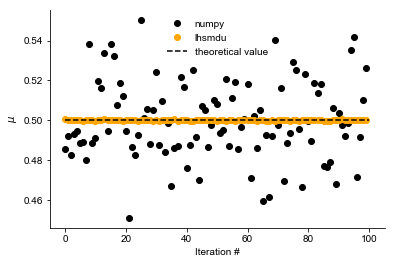

In [6]:
fig, ax = plt.subplots()
ax.plot(range(numIterations), mc_Mean, 'ko', label='numpy')
ax.plot(range(numIterations), lhs_Mean, 'o', c='orange', label='lhsmdu')
ax.hlines(xmin=0, xmax=numIterations, y=theoretical_mean, linestyles='--', label='theoretical value', zorder=3)
ax.set_xlabel("Iteration #")
ax.set_ylabel("$\mu$")
ax.legend(frameon=False)
simpleaxis(ax)
plt.show()

## Plotting standard deviation estimates

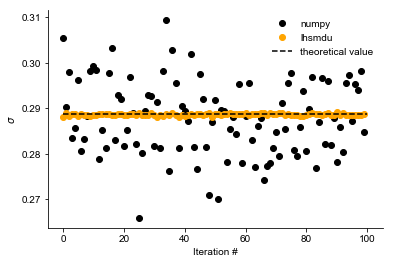

In [7]:
fig, ax = plt.subplots()
ax.plot(range(numIterations), mc_Std, 'ko', label='numpy')
ax.plot(range(numIterations), lhs_Std, 'o', c='orange', label='lhsmdu')
ax.hlines(xmin=0, xmax=numIterations, y=theoretical_std, linestyles='--', label='theoretical value', zorder=3)
ax.set_xlabel("Iteration #")
ax.set_ylabel("$\sigma$")
ax.legend(frameon=False)
simpleaxis(ax)
plt.show()

# Across different number of samples

In [8]:
mc_Std, lhs_Std = [], []
mc_Mean, lhs_Mean = [], []
numSamples = range(1,numIterations)
for iterate in numSamples:
    a = np.random.random((numDimensions,iterate))
    b = lhsmdu.sample(numDimensions,iterate)
    mc_Mean.append(np.mean(a))
    lhs_Mean.append(np.mean(b))
    mc_Std.append(np.std(a))
    lhs_Std.append(np.std(b))

## Plotting mean estimates

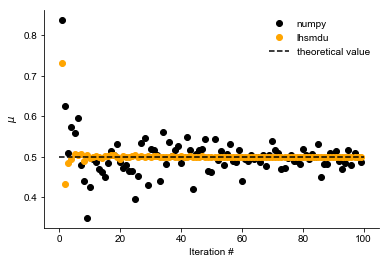

In [9]:
fig, ax = plt.subplots()
ax.plot(numSamples, mc_Mean, 'ko', label='numpy')
ax.plot(numSamples, lhs_Mean, 'o', c='orange', label='lhsmdu')
ax.hlines(xmin=0, xmax=numIterations, y=theoretical_mean, linestyles='--', label='theoretical value', zorder=3)
ax.set_xlabel("Iteration #")
ax.set_ylabel("$\mu$")
ax.legend(frameon=False)
simpleaxis(ax)
plt.show()

## Plotting standard deviation estimates

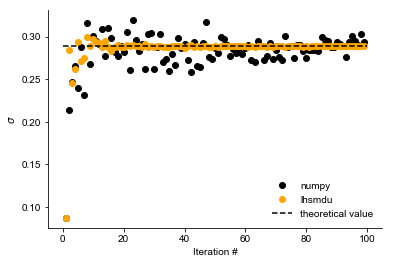

In [10]:
fig, ax = plt.subplots()
ax.plot(numSamples, mc_Std, 'ko', label='numpy')
ax.plot(numSamples, lhs_Std, 'o', c='orange', label='lhsmdu')
ax.hlines(xmin=0, xmax=numIterations, y=theoretical_std, linestyles='--', label='theoretical value', zorder=3)
ax.set_xlabel("Iteration #")
ax.set_ylabel("$\sigma$")
ax.legend(frameon=False)
simpleaxis(ax)
plt.show()